<a href="https://colab.research.google.com/github/mikeusru/scikit-learn-training/blob/main/svm_and_nonlinear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Support Vector Machines, Non-Linear Datasets, and Grid Search

Truth be told, i'd love to give you a great example of a non-linear classification dataset, but i haven't seen a good one yet. So, for this tutorial, we're going to generate some fake data and try to create a classifier for it.

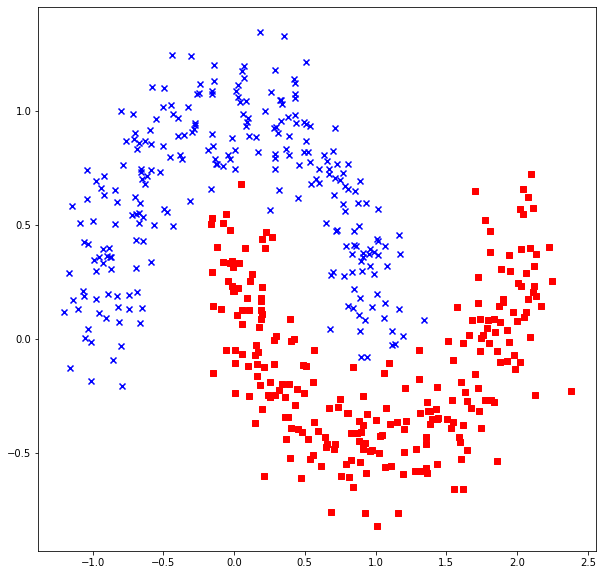

In [78]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

RANDOM_SEED = 42

X,y = make_moons(n_samples=500, noise=0.15)
plt.figure(figsize=(10,10))
plt.scatter(X[y==0,0],X[y==0,1],
            c='b', marker='x')
plt.scatter(X[y==1,0],X[y==1,1],
            c='r', marker='s')

## Trying a linear divide
What if we use a linear Support Vector Machine? Spoiler alert, it wouldn't work. There's clearly no line we could draw to naturally divide to this data, but hey, let's give it a shot.

In [79]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1000, random_state=RANDOM_SEED)
svm.fit(X, y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


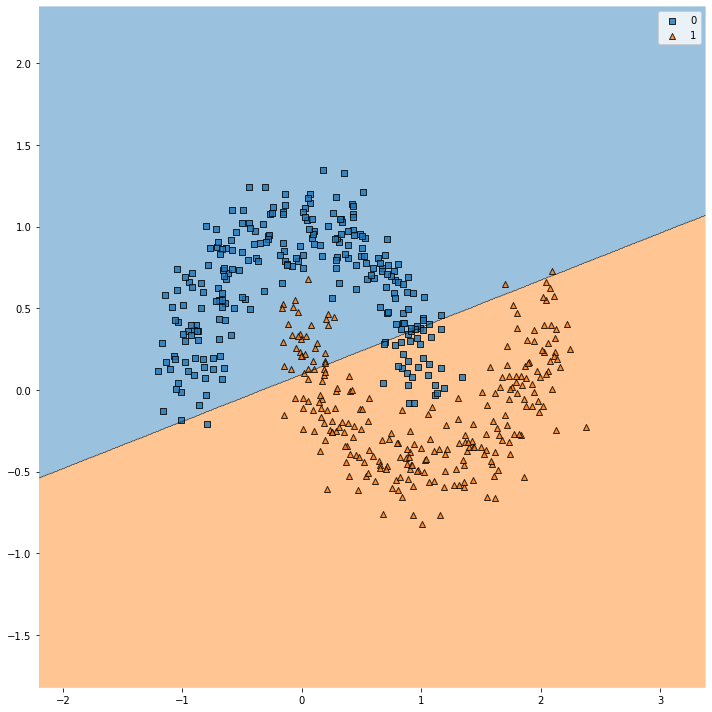

In [80]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10,10))
plot_decision_regions(X, y, clf=svm, legend=2)
plt.legend()
plt.tight_layout()

Not great, you guys. But we knew that. Onto being better.

## Nonlinear SVM
One thing we could do is to add more features, such as polynomial features. This can result in a dataset that's linearly separable. Basically, we're messing around with the data to make it divisible by a straight line. In the image below, the image on the left represents a dataset that's not linearly separable, but applying a polynomial transformation to it create a place where it can be separated by a straight line (right)

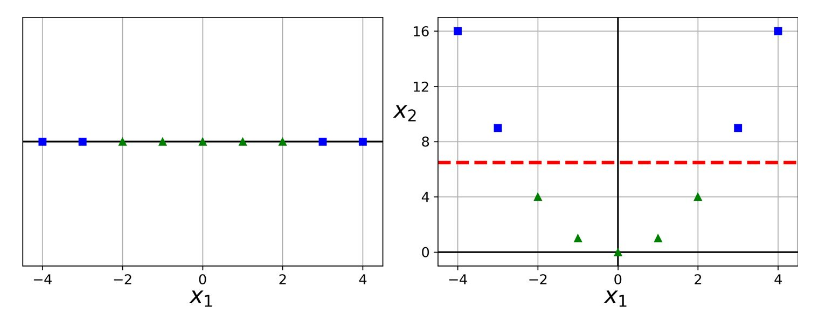

In [81]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline([
                               ("poly_features", PolynomialFeatures(degree=3)),
                               ("scaler", StandardScaler()),
                               ("svm_clf", LinearSVC(C=10, loss="hinge")),
])

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [82]:
def plot_classifier_graph(X, y, clf):
  plt.figure(figsize=(10,10))
  plot_decision_regions(X, y, clf=clf, legend=2)
  plt.legend()
  plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


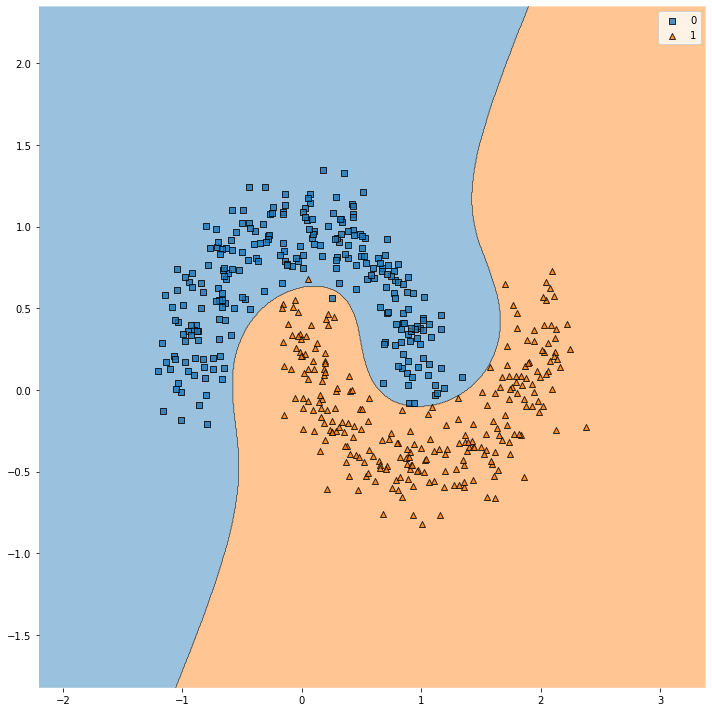

In [84]:
plot_classifier_graph(X, y, polynomial_svm_clf)

EYYYYY! that's a lot better! We still used our model, added a third-order polynomial feature to the dataset, and got this pretty hourglass-looking thing.
## Polynomial Kernel
Of course, instead of adding a polynomial preprocessing step, we can change the linear model to a polynomial one. This can help us fit more complex features, and speed up the model in some cases. We're going to use something called the *kernel trick* to simply change the kernel of the model to fit our dataset.

In [85]:
poly_kernel_svm_clf = Pipeline([
                               ("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)),
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


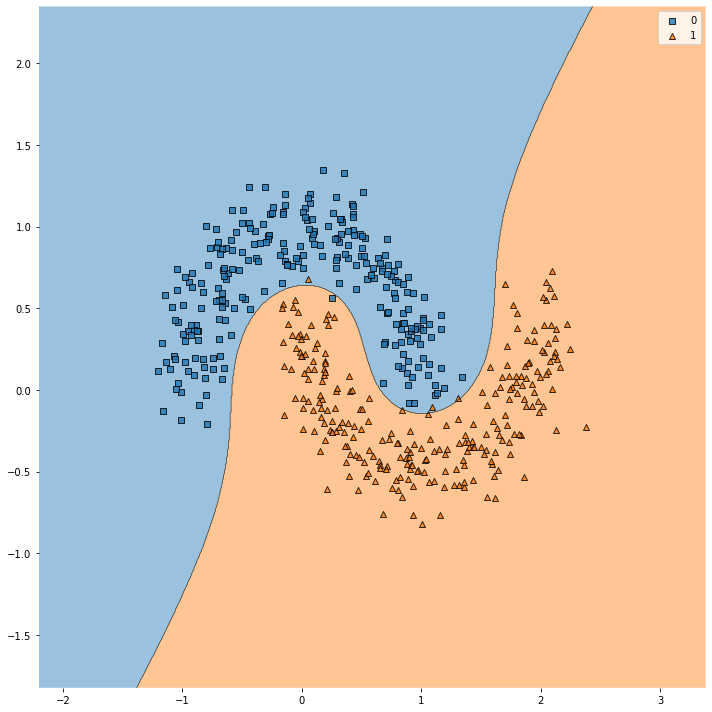

In [86]:
plot_classifier_graph(X, y, poly_kernel_svm_clf)

Same! we can also play with the degree to see what it looks like when we overfit.

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


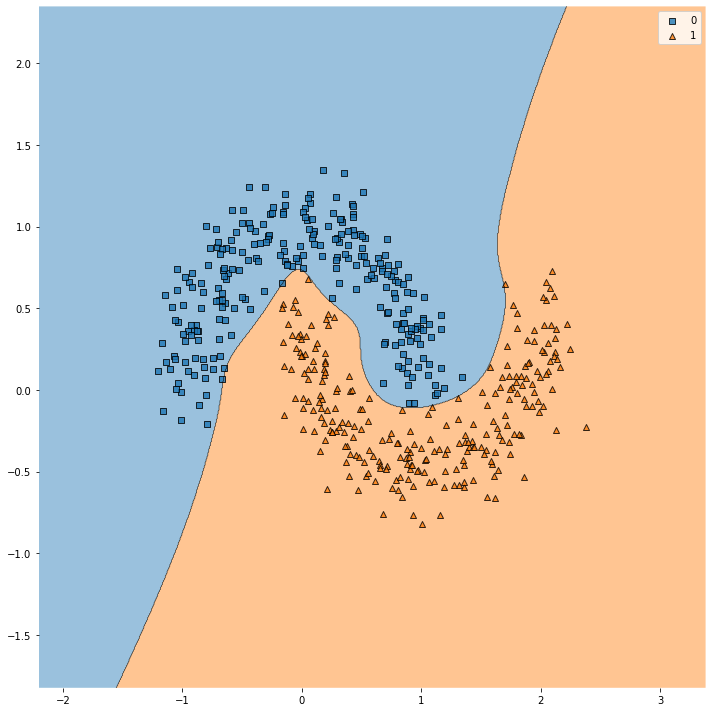

In [87]:
poly_kernel_svm_clf = Pipeline([
                               ("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel="poly", degree=20, coef0=1, C=5)),
])
poly_kernel_svm_clf.fit(X, y)
plot_classifier_graph(X, y, poly_kernel_svm_clf)

This graph is fitting the data even more, yet it's not necessarily a better fit because the model is now less likely to generalize well to new data.

Another commonly used kernel is the Gaussian RBF Kernel. Let's give that a try as well.

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


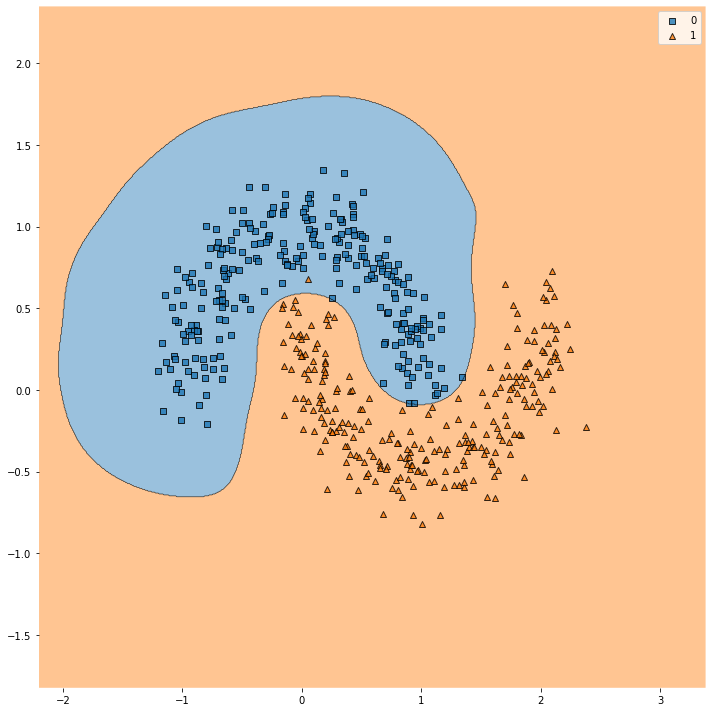

In [88]:
poly_kernel_svm_clf = Pipeline([
                               ("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.1)),
])
poly_kernel_svm_clf.fit(X, y)
plot_classifier_graph(X, y, poly_kernel_svm_clf)

## Grid Search
Gamma, C, polynomial degree... these hyperparameters need to be tuned, and one way of doing it is through a **grid search**. Here, we try lots of combinations to see which ones fit our data the best.

In [89]:
from sklearn.model_selection import GridSearchCV

param_grid_SVC = [
                  {'SVC__kernel':['rbf'], 'SVC__gamma': [2,5,8,12], 'SVC__C': [0.001, 0.1, .5, 1, 10, 100, 1000]},
                  {'SVC__kernel':['poly'], 'SVC__degree': [2,3,4,5,6,7], 'SVC__C': [1, 5, 10, 100]},
              ]

poly_kernel_svm_clf = Pipeline([
                               ("scaler", StandardScaler()),
                               ("SVC", SVC(random_state=RANDOM_SEED)),
])

grid_search = GridSearchCV(estimator=poly_kernel_svm_clf,
                           param_grid=param_grid_SVC,
                           cv=5, return_train_score=True)

grid_search.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('SVC',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False, random_state=42,
                                            shrinking=True, tol=0.001,
                                            

In [90]:
grid_search.best_params_

{'SVC__C': 0.1, 'SVC__gamma': 5, 'SVC__kernel': 'rbf'}

Voila, those are the best parameters. Never mind what they mean for now! let's just sub them in and make our chart, already.

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


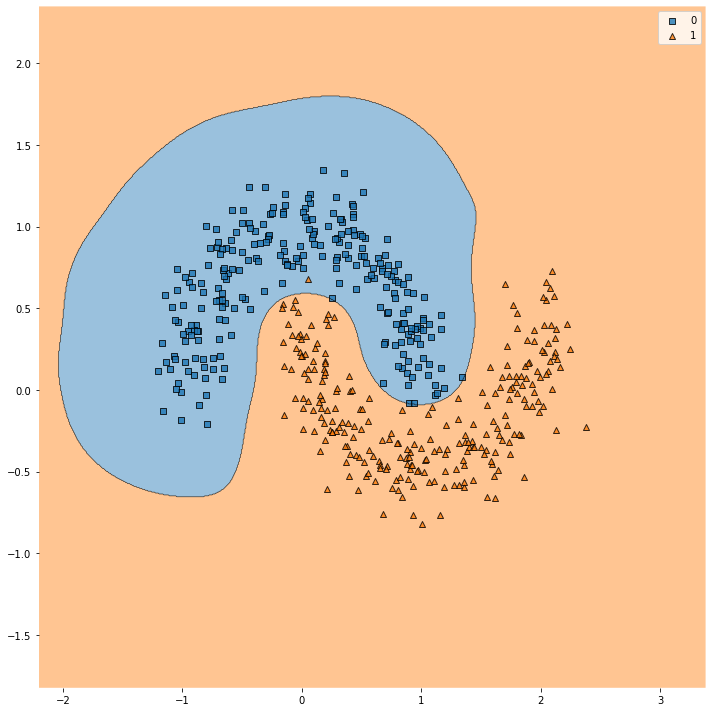

In [92]:
poly_kernel_svm_clf = Pipeline([
                               ("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.1)),
])
poly_kernel_svm_clf.fit(X, y)
plot_classifier_graph(X, y, poly_kernel_svm_clf)

And there you have it. Perhaps to us this might look like overfitting, but it's what we get. A good reminder than intuition about the base dataset can often hold more information than randomly testing hyperparameter combinations.